# Bayesian models with Python

Plan

* [bayespy](#bayespy)
* [scikit-learn](#scikit)

You can read [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb). Results might be different between examples. The example used is the same but the default parameters the optimisation uses are different.

We try different python model to deal with a Bayesian problem: a Gaussian Mixture. We will use the following example.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

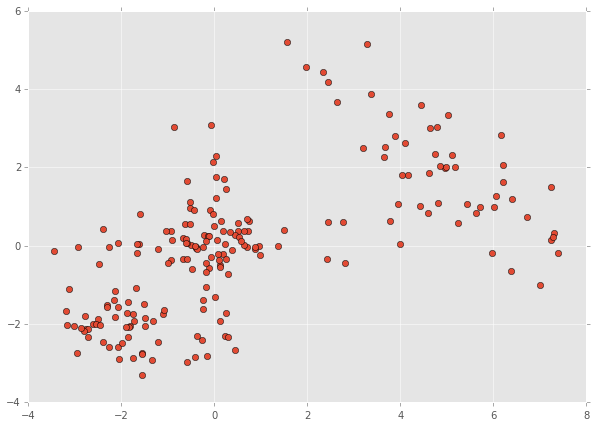

In [3]:
import numpy as np
y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=50)
y1 = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 2]], size=50)
y2 = np.random.multivariate_normal([5, 2], [[2, -1.5], [-1.5, 2]], size=50)
y3 = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], size=50)
y = np.vstack([y0, y1, y2, y3])
X=y

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
ax.plot(y[:,0], y[:,1], "o")

<h3 id="bayespy">bayespy</h3>

The module [bayespy](http://www.bayespy.org/) allows to build and estimate simple bayesian models. I just replicate the example on the [Gaussian mixture model](http://www.bayespy.org/examples/gmm.html).

We define the model:

In [4]:
N = 200  # number of data vectors
D = 2    # dimension
K = 10   # maximum number of clusters

In [5]:
from bayespy.nodes import Dirichlet, Categorical, Gaussian, Wishart, Mixture
alpha = Dirichlet(1e-5*np.ones(K), name='alpha')
Z = Categorical(alpha,plates=(N,), name='z')
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D), plates=(K,), name='mu')
sigma = Wishart(D, 1e-5*np.identity(D), plates=(K,), name='Lambda')
Y = Mixture(Z, Gaussian, mu, sigma, name='Y')

In [6]:
Z.initialize_from_random()

In [7]:
from bayespy.inference import VB
Q = VB(Y, mu, sigma, Z, alpha)

In [8]:
Y.observe(y)

In [9]:
Q.update(repeat=1000)

Iteration 1: loglike=-1.489778e+03 (0.010 seconds)
Iteration 2: loglike=-1.351484e+03 (0.010 seconds)
Iteration 3: loglike=-1.339217e+03 (0.013 seconds)
Iteration 4: loglike=-1.330373e+03 (0.010 seconds)
Iteration 5: loglike=-1.322339e+03 (0.010 seconds)
Iteration 6: loglike=-1.314271e+03 (0.014 seconds)
Iteration 7: loglike=-1.305603e+03 (0.018 seconds)
Iteration 8: loglike=-1.294309e+03 (0.017 seconds)
Iteration 9: loglike=-1.281183e+03 (0.011 seconds)
Iteration 10: loglike=-1.270759e+03 (0.009 seconds)
Iteration 11: loglike=-1.262394e+03 (0.014 seconds)
Iteration 12: loglike=-1.253184e+03 (0.009 seconds)
Iteration 13: loglike=-1.238766e+03 (0.010 seconds)
Iteration 14: loglike=-1.211999e+03 (0.011 seconds)
Iteration 15: loglike=-1.161828e+03 (0.021 seconds)
Iteration 16: loglike=-1.125046e+03 (0.010 seconds)
Iteration 17: loglike=-1.101282e+03 (0.013 seconds)
Iteration 18: loglike=-1.097022e+03 (0.011 seconds)
Iteration 19: loglike=-1.090349e+03 (0.015 seconds)
Iteration 20: loglike

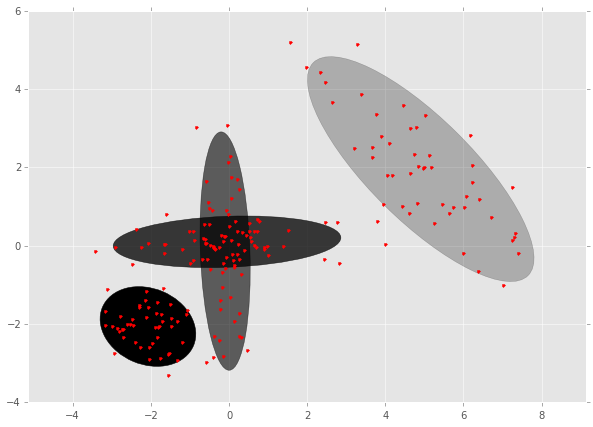

In [10]:
import bayespy.plot as bpplt
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot("111")
bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2, color="black", fill=True, axes=ax)

We get the result of the optimization:

In [11]:
from bayespy.inference.vmp.nodes.gaussian import GaussianWishartMoments
mu_Lambda = Y.parents[1]._convert(GaussianWishartMoments)
(mu, _, sigma, _) = mu_Lambda.get_moments()
(mu, _, sigma, _)
mu, sigma

(array([[ 0.        ,  0.        ],
        [-1.0526977 , -0.09581534],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [-7.04295894, -9.55748732],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [-0.05805719,  0.92309653],
        [ 8.29467506,  7.57817239]]),
 array([[[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  9.91529506e+00,   3.31469274e-01],
         [  3.31469274e-01,   4.40689572e-01]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  2.76419143e+00,   6.28175906e-01],
         [  6.28175906e-01,   3.98269475e+00]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         [  0.00000000e+00,   2.00000000e+05]],
 
        [[  2.00000000e+05,   0.00000000e+00],
         

In [12]:
import numpy as np
mu2 = np.linalg.solve(sigma, mu)
mu2

array([[ 0.        ,  0.        ],
       [-0.10145164, -0.14111349],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-2.07702052, -2.07215305],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.05261406,  0.09642714],
       [ 4.90551999,  1.95772661]])

The way you can build your model is quite nice but it still needs some development. scikit-learn proposes a better interface.

<h3 id="scikit">scikit-learn</h3>

We try to solve the same problem with another module: [scikit-learn](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#example-mixture-plot-gmm-py).

In [13]:
from sklearn import mixture
gmm = mixture.GMM(n_components=10, covariance_type='full')
gmm.fit(X)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)

In [14]:
dpgmm = mixture.DPGMM(n_components=10, covariance_type='full')
dpgmm.fit(X)

DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=10, n_iter=10, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=False)

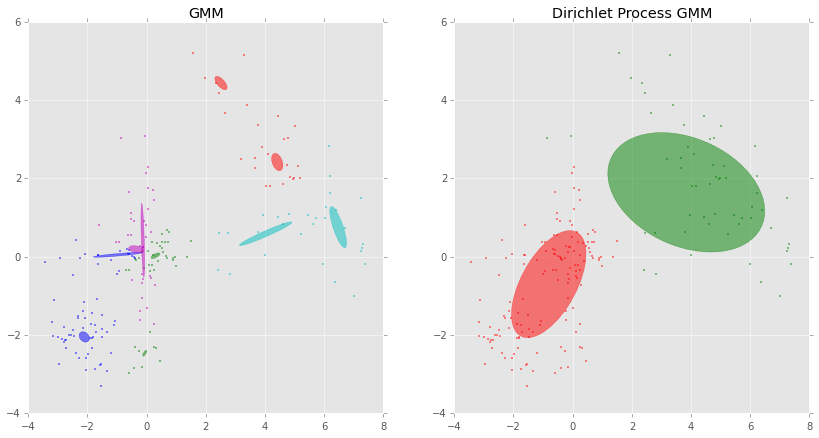

In [15]:
import itertools
import matplotlib as mpl
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
f, axarr = plt.subplots(1, 2, figsize=(14,7))

for i, (clf, title) in enumerate([(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    splot = axarr[i]
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = np.linalg.eigh(covar)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        splot.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        splot.set_title(title)